<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-in-DevTown/blob/main/Day_48_Project_on_Logistic_Regression_(Titanic_Survival_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Titanic Survival Dataset

In [ ]:
# TARGET =>> Survived

# Steps

1. Import the libraries
2. Import the dataset
3. Perform the Data Analysis (DM, DE, DC, DV, EDA)
4. Feature Scaling [Optional]
5. Encoding
6. Feature Selection
7. Choosing the model - Logistic Regression
8. Split the data - CV
9. Training the model
10. Test the model
11. Performance - Confusion Metric

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

# Importing Dataset

Link : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Data Analysis

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

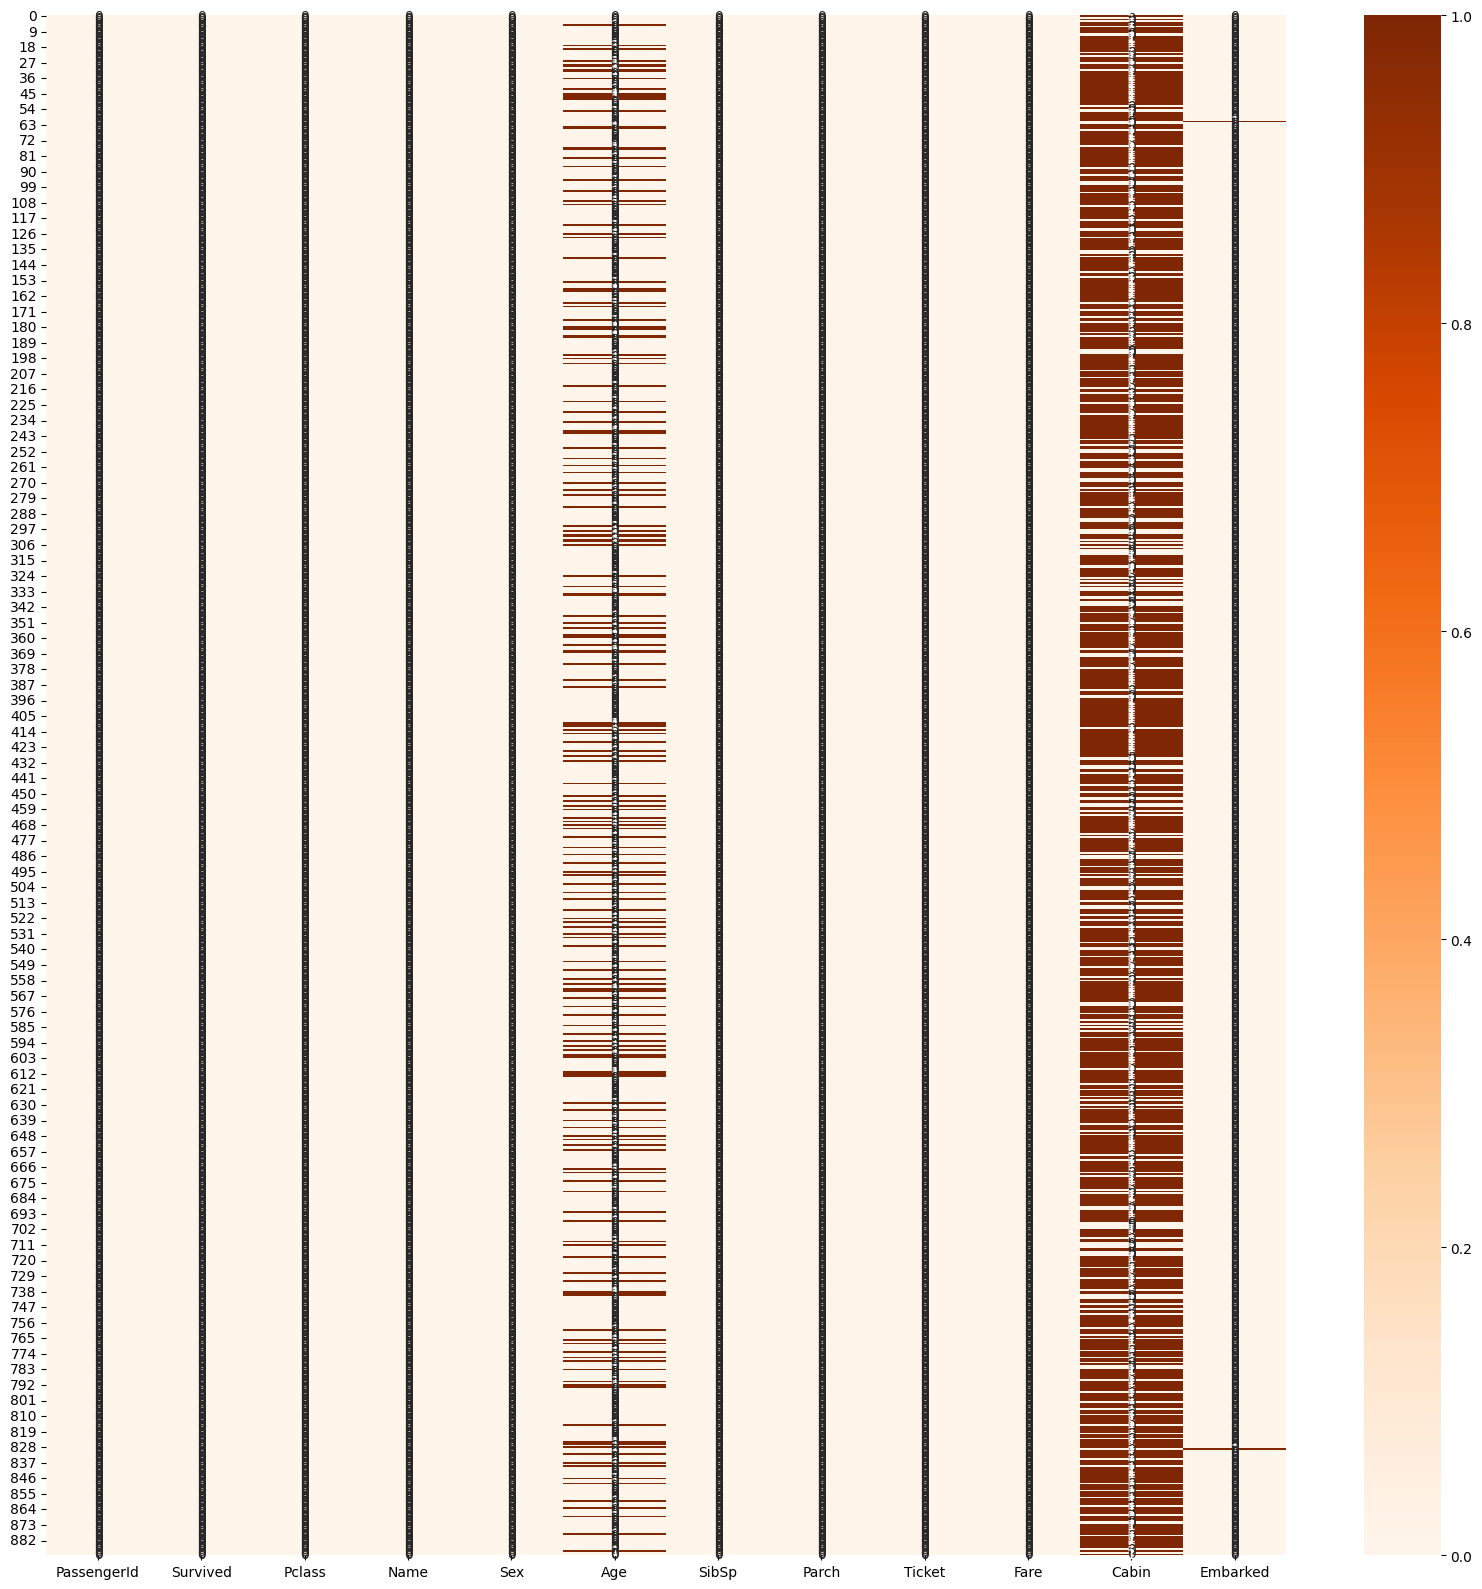

In [ ]:
#heatmap for null values in each column
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),annot=True,cmap='Oranges')

Observation:

"Age","Cabin","Embarked" Columns have null values wich shows by fluctuations in heatmap.

# Data Cleaning

In [ ]:
#Age % of null values
(df.Age.isnull().sum()/len(df.Age)) * 100

19.865319865319865

In [ ]:
#Cabin % of null values
(df.Cabin.isnull().sum()/len(df.Cabin)) * 100

77.10437710437711

In [ ]:
#Embarked % of null values
(df.Embarked.isnull().sum()/len(df.Embarked)) * 100

0.22446689113355783

In [ ]:
#Unique values in column 'Cabin'
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df.Cabin.nunique()

147

In [ ]:
# Drop the Cabin Feature
df.drop('Cabin',axis=1,inplace=True)

Conclusion:

Dropping 'Cabin' Column because it contains many null values.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.Embarked.unique()
# S - Southampton
# C - Cherbourg
# Q - Queenstown

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# Datapoints where the Embarked is null
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
#Embarked values where the Pclass = 1
df.loc[df.Pclass==1,'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
#Embarked values where the Pclass = 2
df.loc[df.Pclass==2,'Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [ ]:
#Embarked values where the Pclass = 3
df.loc[df.Pclass==3,'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
#Embarked value where the Fare = 80.0
df.loc[df.Fare==80.0,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
#Embarked value where the Ticket = 113572
df.loc[df.Ticket==113572,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

Conclusion:

Here,we cannot predict 'Embarked' value by 'Pclass','Fare','Ticket'.So,we don't need 'Embarked' column.

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# Mean of Age column
df.Age.mean()

29.69911764705882

In [ ]:
# Mean of Age column
df.Age.median()

28.0

In [ ]:
# Mean of Age column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

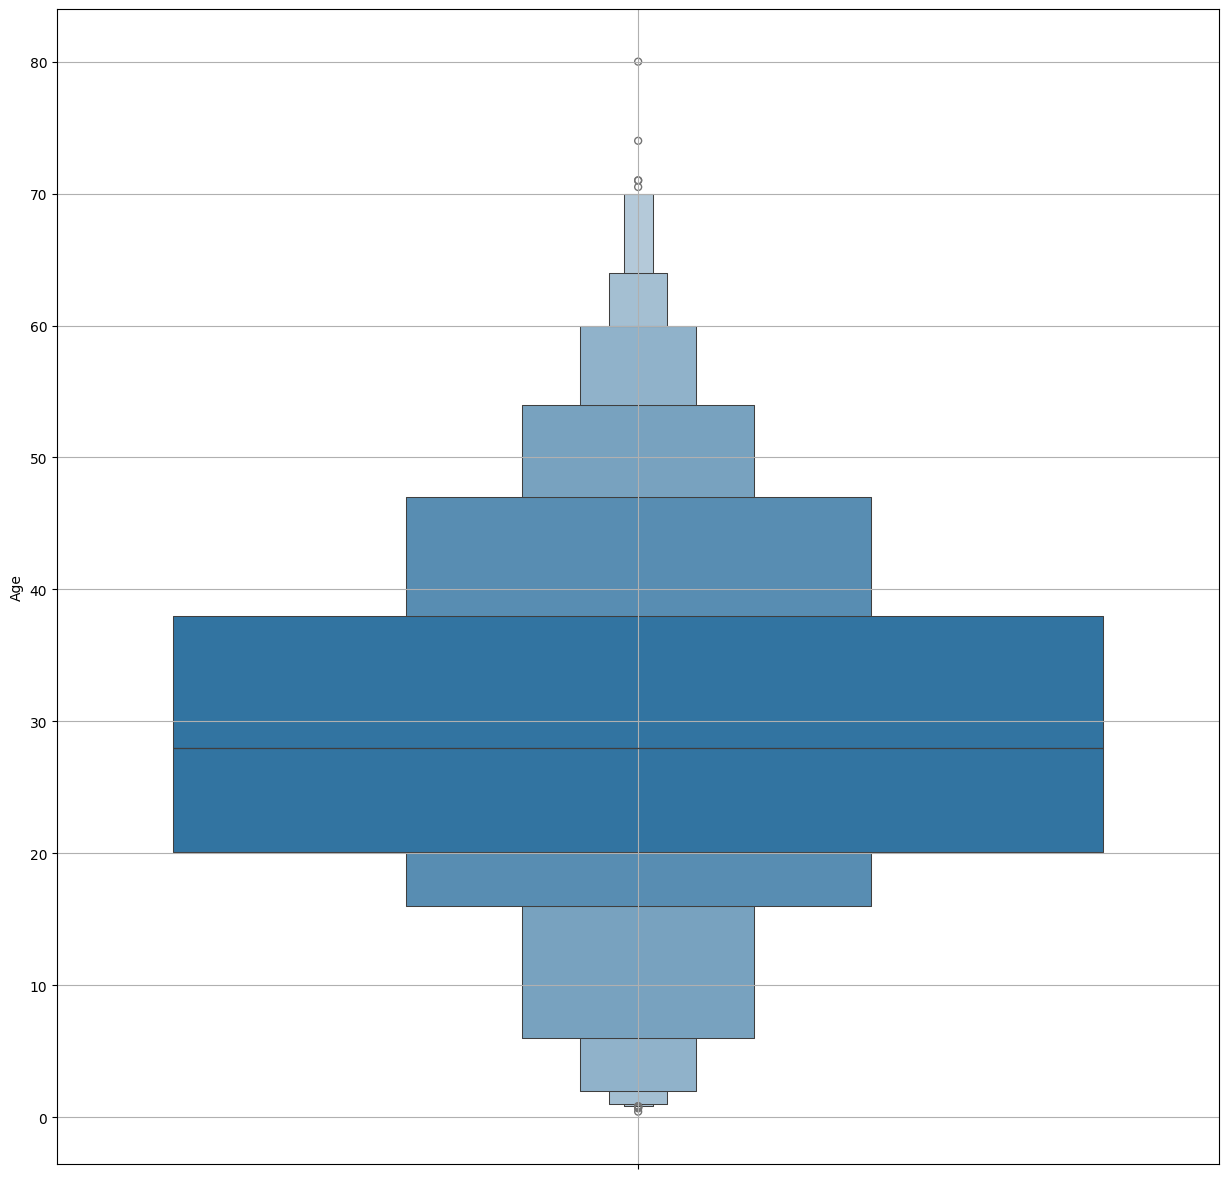

In [ ]:
# Plot a boxpolot to find out the outliers in the 'Age' column
plt.figure(figsize=(15,15))
sns.boxenplot(df.Age)
plt.grid()


In [ ]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
df.Age.nunique()

88

In [ ]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
df.shape

(891, 11)

In [ ]:
# Filling all the null values in the Age column with its MEDIAN value
df.Age.fillna(value=df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Droping the rows where Embarked is Null
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.shape

(889, 11)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Rounding off the values of 'Fare' column upto 2 decimal.
df.Fare = round(df.Fare,2)

In [ ]:
# Dropping off the useless columns -> PassengerId, Name, Ticket
df.drop(['PassengerId', 'Name', 'Ticket'],inplace=True,axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S
1,1,1,female,38.0,1,0,71.28,C
2,1,3,female,26.0,0,0,7.92,S
3,1,1,female,35.0,1,0,53.10,S
4,0,3,male,35.0,0,0,8.05,S


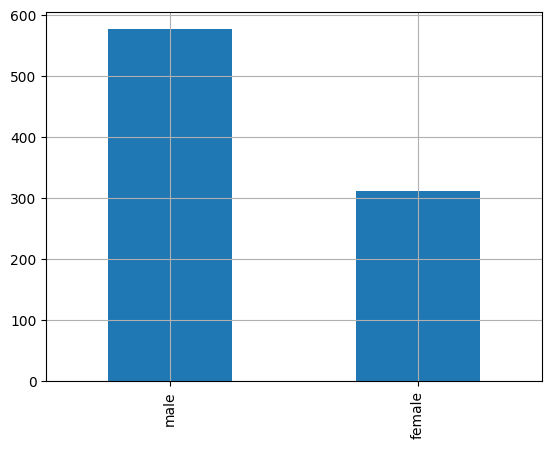

In [ ]:
# Plot a graph : Strength of Male V/s Strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

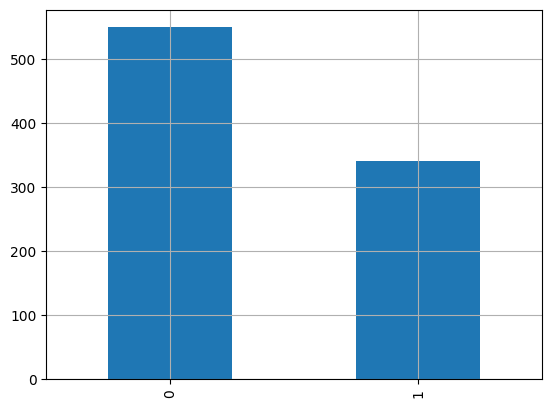

In [ ]:
# Plot a graph : Strength of Survival V/s Strength of Non-survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

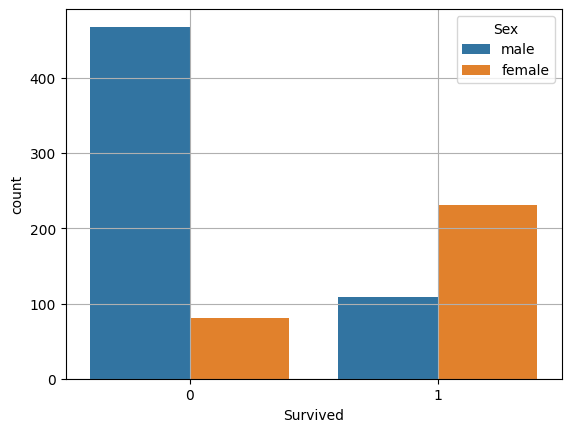

In [ ]:
# Plot a graph: To find out the survival & non-survival rate w.r.t. Sex
sns.countplot(x='Survived' , data=df , hue='Sex')
plt.grid()

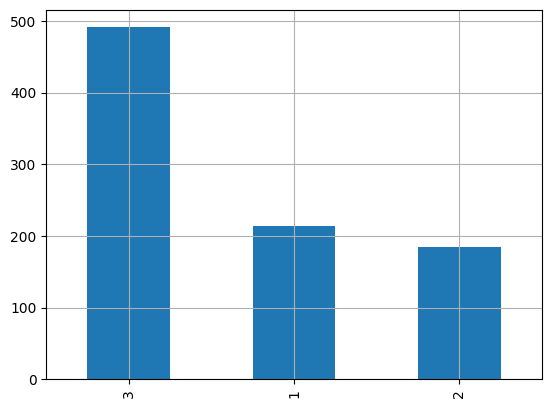

In [ ]:
# Plot a graph:To find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

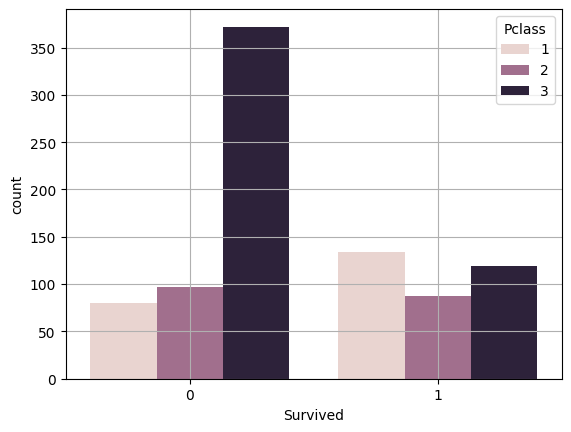

In [ ]:
# Plot a graph:To find out the survival & non-survival rate w.r.t. Pclass
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.grid()

In [ ]:
#Changing the Age dtype to 'int'
df.Age = df.Age.astype(int)

# Encoders -
 To convert the data from the categorical form to numerical form without changing its meaning.

In [ ]:
# Label encoding for the column 'Sex'

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Sex = enc.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


Observation:
Categorical data of 'Sex' column changes into Numerical form.

In [ ]:
#One Hot encoding for the column 'Embarked'

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [ ]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 57.3 KB


<Axes: >

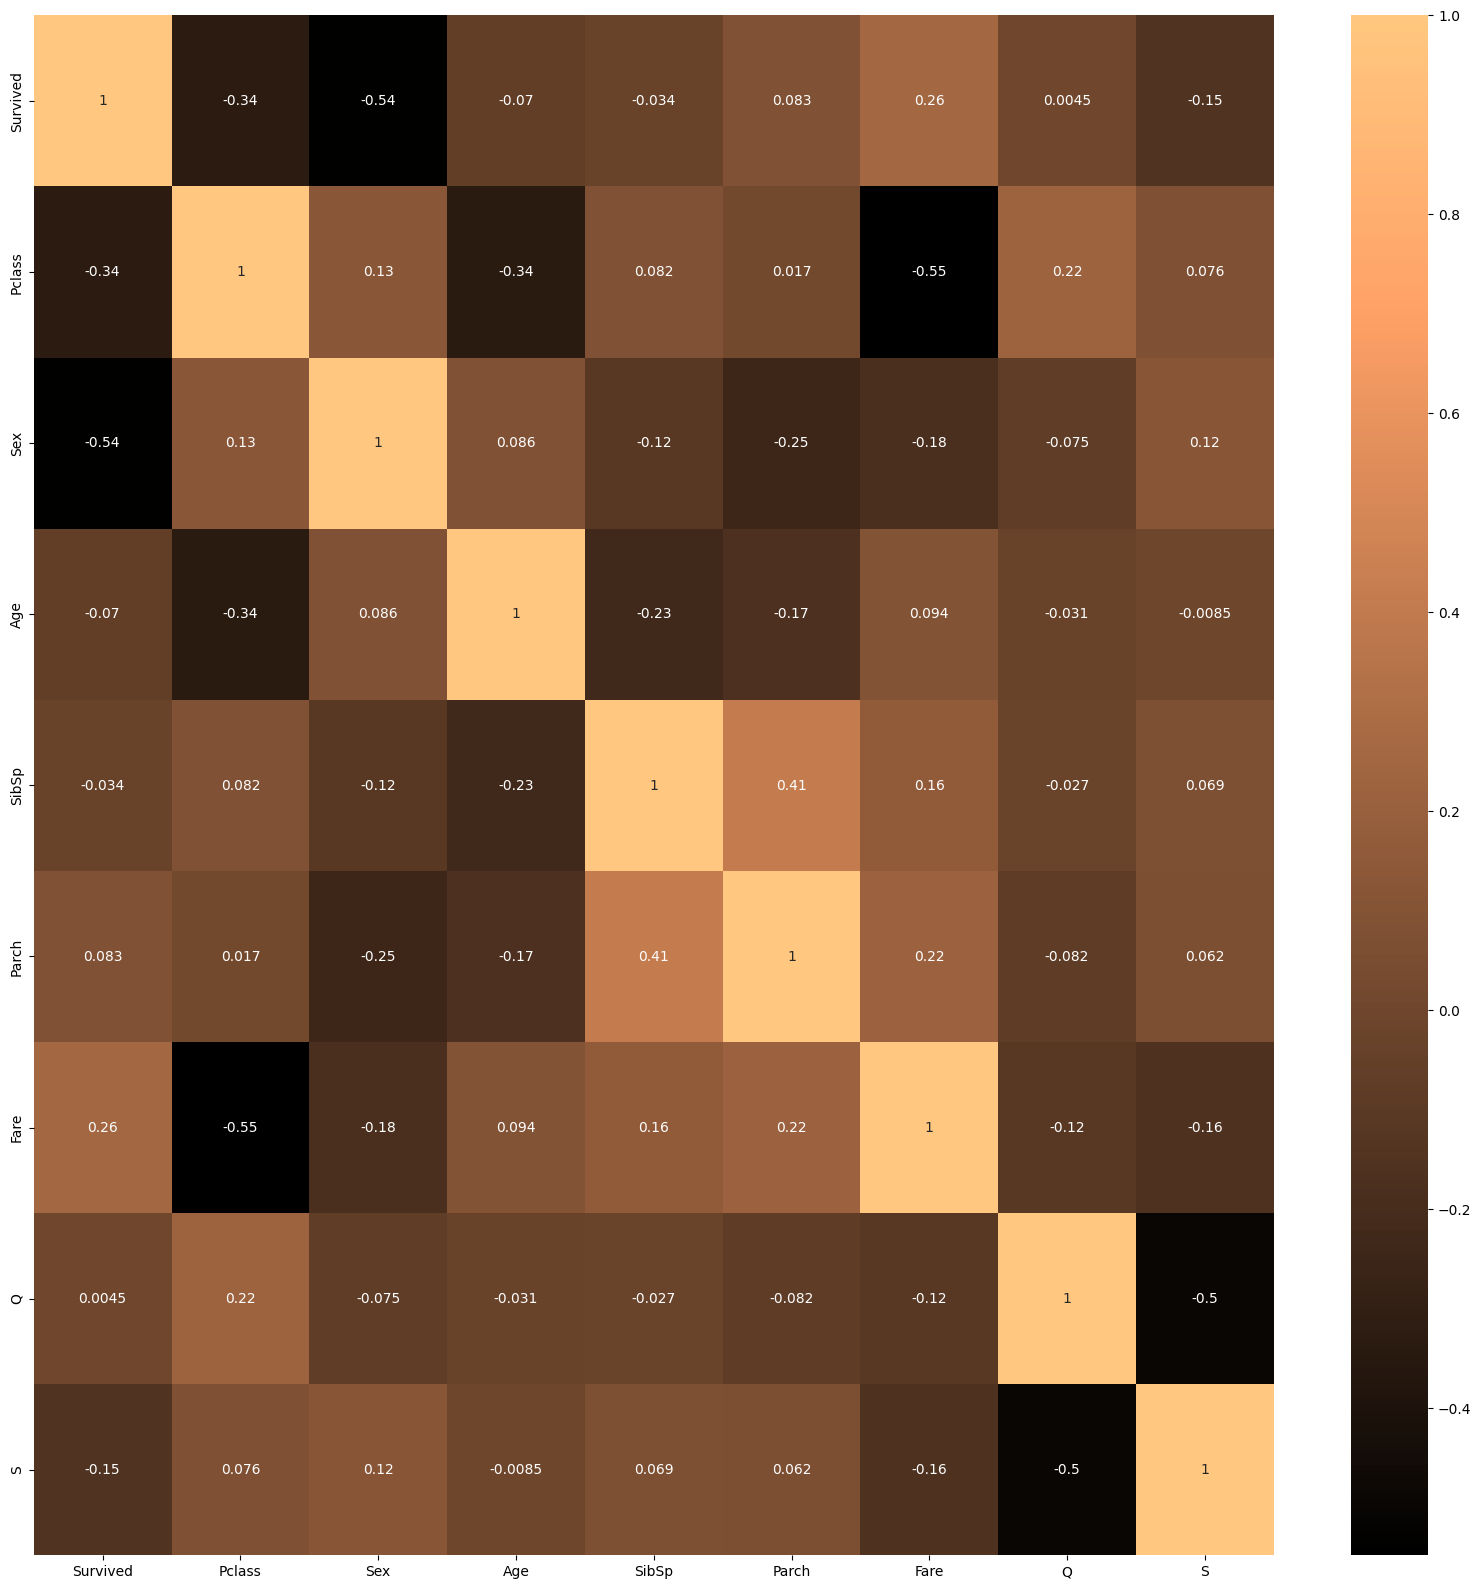

In [ ]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='copper')

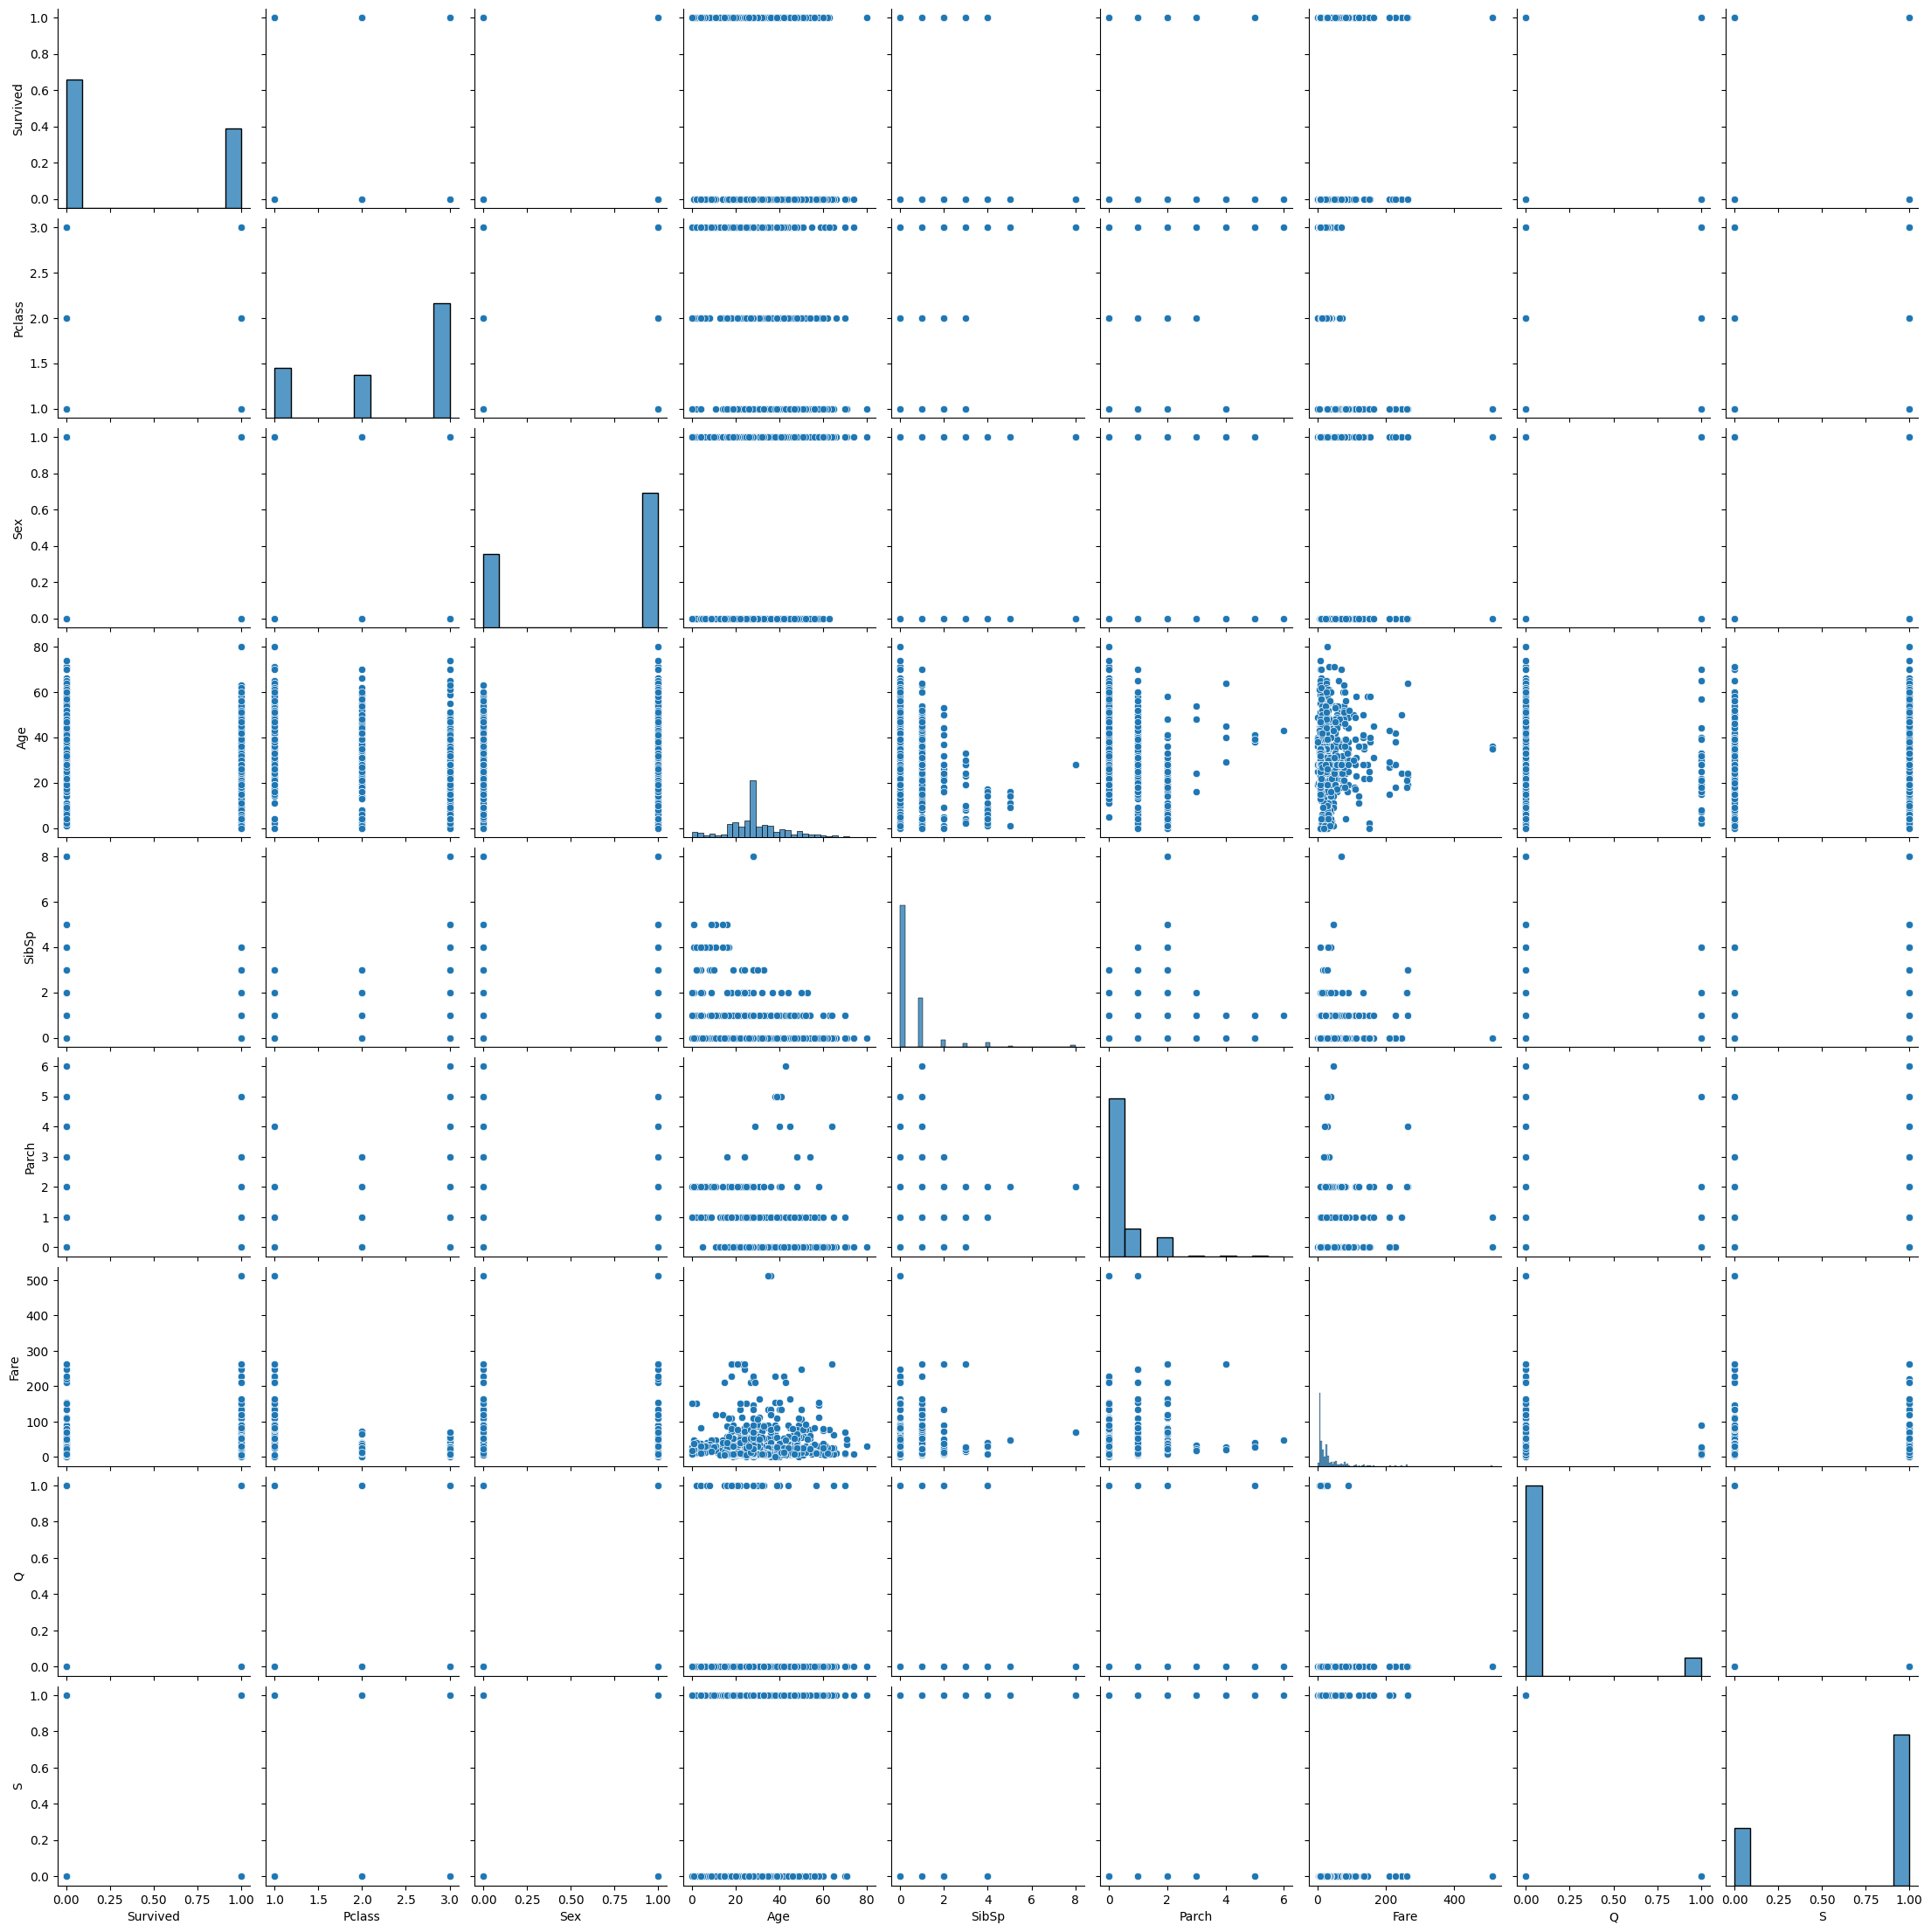

In [ ]:
#pairplot
sns.pairplot(df)

# Feature Importance/Selection

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat = ExtraTreesClassifier()

In [ ]:
feat.fit(X,y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.10759059, 0.28590467, 0.24191626, 0.04899711, 0.04463415,
       0.24043533, 0.00923801, 0.02128388])

In [ ]:
feat_imp = pd.Series(feat.feature_importances_,index=X.columns)

<Axes: >

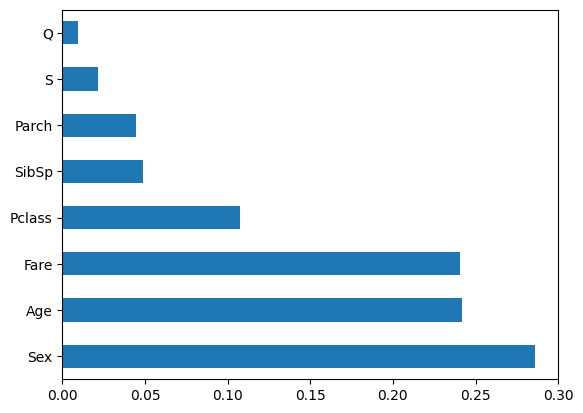

In [ ]:
feat_imp.nlargest(8).plot(kind='barh')

# Spliting of Data

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
for train_index,test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 177, dtype: int64

# Model Selection

In [ ]:
classifier =LogisticRegression()

# Training the Model

In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the Model

In [ ]:
y_pred = classifier.predict(X_test)

# EDA

In [ ]:
final = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [ ]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

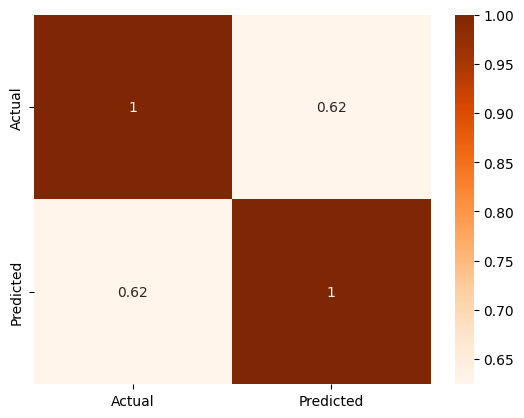

In [ ]:
sns.heatmap(final.corr(),annot=True,cmap='Oranges')

# Performance Metric - Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[98, 11],
       [20, 48]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8248587570621468

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

# Exportation of model & dataset

Module ---> Pickle

Serialisation - Deserialisation

Dumping - Undumping

Pickling - Unpickling

In [ ]:
# Save and Load ML model by "pickle" module

In [ ]:
import pickle

In [ ]:
pick = pickle.dumps(classifier)

In [ ]:
unpickle = pickle.load(pick)